# Disclaimer
The dataset used in this project is entirely simulated for demonstration purposes. As such, some values, patterns, or results may not accurately reflect real-world business scenarios and should be interpreted accordingly.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\shadow net\data analysis\Raw Data\shopwise_sales_data.csv')

In [3]:
df.head()

order_id customer_id    customer_name                              email  \
0  ORD100000    CUST8820   Sierra Stewart  matthewevans@gardner-salinas.info   
1  ORD100001    CUST5067   Rebecca Miller            kingmelissa@hotmail.com   
2  ORD100002    CUST7937  Andrea Gallegos           schwartzbriana@gmail.com   
3  ORD100003    CUST7964  Matthew Collins              debramclean@gmail.com   
4  ORD100004    CUST3681   Gregory Arnold            lauracherry@hotmail.com   

            city   country  order_date delivery_date product_id  \
0         Butare    Rwanda  2025-03-14    2025-03-19    PROD581   
1  Dar es Salaam  Tanzania  2024-08-12    2024-08-17    PROD214   
2           Gulu    Uganda  2024-12-13    2024-12-17    PROD557   
3         Kigali    Rwanda  2025-06-23    2025-06-29    PROD725   
4         Butare    Rwanda  2024-08-24    2024-08-28    PROD450   

     product_name        category   price  quantity discount_code_used  \
0       Biography           Books  431.95         4             DEAL25   
1  Vacuum Cleaner  Home & Kitchen  223.69         3             DISC10   
2        Cookbook           Books  132.03         2             DEAL25   
3        Lipstick          Beauty  385.97         3                NaN   
4      Sunglasses         Fashion  136.34         3                NaN   

  marketing_channel    payment_method order_status  return_reason  \
0            Direct              Card    Completed            NaN   
1            Direct  Cash on Delivery    Completed            NaN   
2          Referral  Cash on Delivery    Completed            NaN   
3             Email            M-Pesa    Completed            NaN   
4        Google Ads              Card     Returned  Late delivery   

  is_repeat_customer  
0                 No  
1                Yes  
2                 No  
3                 No  
4                 No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            5000 non-null   object 
 1   customer_id         5000 non-null   object 
 2   customer_name       5000 non-null   object 
 3   email               5000 non-null   object 
 4   city                5000 non-null   object 
 5   country             5000 non-null   object 
 6   order_date          5000 non-null   object 
 7   delivery_date       5000 non-null   object 
 8   product_id          5000 non-null   object 
 9   product_name        5000 non-null   object 
 10  category            5000 non-null   object 
 11  price               5000 non-null   float64
 12  quantity            5000 non-null   int64  
 13  discount_code_used  3958 non-null   object 
 14  marketing_channel   5000 non-null   object 
 15  payment_method      5000 non-null   object 
 16  order_

In [5]:
df.isnull().sum().sort_values(ascending = False)

return_reason         4510
discount_code_used    1042
order_id                 0
category                 0
order_status             0
payment_method           0
marketing_channel        0
quantity                 0
price                    0
product_name             0
customer_id              0
product_id               0
delivery_date            0
order_date               0
country                  0
city                     0
email                    0
customer_name            0
is_repeat_customer       0
dtype: int64

In [6]:
df.duplicated().any()

False

In [7]:
df.describe()

price   quantity
count  5000.000000  5000.0000
mean    251.499360     2.4998
std     142.795169     1.1151
min       5.090000     1.0000
25%     127.545000     1.0000
50%     250.445000     3.0000
75%     373.740000     3.0000
max     499.920000     4.0000

In [8]:
df.shape

(5000, 19)

# Sales Performance


In [9]:
df['Total_Revenue'] = df['quantity'] * df['price']

In [10]:
df.head()

order_id customer_id    customer_name                              email  \
0  ORD100000    CUST8820   Sierra Stewart  matthewevans@gardner-salinas.info   
1  ORD100001    CUST5067   Rebecca Miller            kingmelissa@hotmail.com   
2  ORD100002    CUST7937  Andrea Gallegos           schwartzbriana@gmail.com   
3  ORD100003    CUST7964  Matthew Collins              debramclean@gmail.com   
4  ORD100004    CUST3681   Gregory Arnold            lauracherry@hotmail.com   

            city   country  order_date delivery_date product_id  \
0         Butare    Rwanda  2025-03-14    2025-03-19    PROD581   
1  Dar es Salaam  Tanzania  2024-08-12    2024-08-17    PROD214   
2           Gulu    Uganda  2024-12-13    2024-12-17    PROD557   
3         Kigali    Rwanda  2025-06-23    2025-06-29    PROD725   
4         Butare    Rwanda  2024-08-24    2024-08-28    PROD450   

     product_name        category   price  quantity discount_code_used  \
0       Biography           Books  431.95         4             DEAL25   
1  Vacuum Cleaner  Home & Kitchen  223.69         3             DISC10   
2        Cookbook           Books  132.03         2             DEAL25   
3        Lipstick          Beauty  385.97         3                NaN   
4      Sunglasses         Fashion  136.34         3                NaN   

  marketing_channel    payment_method order_status  return_reason  \
0            Direct              Card    Completed            NaN   
1            Direct  Cash on Delivery    Completed            NaN   
2          Referral  Cash on Delivery    Completed            NaN   
3             Email            M-Pesa    Completed            NaN   
4        Google Ads              Card     Returned  Late delivery   

  is_repeat_customer  Total_Revenue  
0                 No        1727.80  
1                Yes         671.07  
2                 No         264.06  
3                 No        1157.91  
4                 No         409.02

In [11]:
df['Total_Revenue'].sum()

3143063.38

In [12]:
df.groupby('category')['price'].sum().sort_values(ascending = False)

category
Beauty            214052.00
Books             213021.24
Electronics       211068.67
Toys              209733.37
Home & Kitchen    205523.05
Fashion           204098.47
Name: price, dtype: float64

In [13]:
plt.style.use('fivethirtyeight')

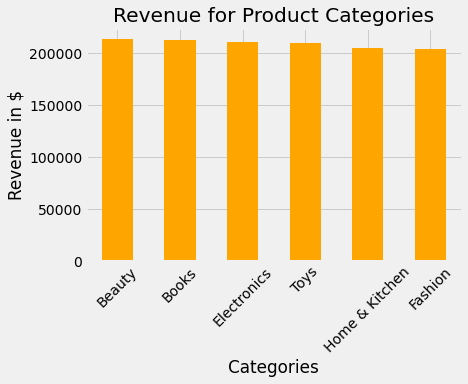

In [14]:
df.groupby('category')['price'].sum().sort_values(ascending = False).plot.bar(color = 'orange')
plt.title('Revenue for Product Categories', color = 'black')
plt.xlabel('Categories')
plt.ylabel('Revenue in $')
plt.xticks(rotation = 45)

plt.show()

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [16]:
df['order_date'].info()
df['delivery_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: delivery_date
Non-Null Count  Dtype         
--------------  -----         
5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


In [17]:
df['month'] = df['order_date'].dt.strftime('%b')

In [18]:
df.head()

order_id customer_id    customer_name                              email  \
0  ORD100000    CUST8820   Sierra Stewart  matthewevans@gardner-salinas.info   
1  ORD100001    CUST5067   Rebecca Miller            kingmelissa@hotmail.com   
2  ORD100002    CUST7937  Andrea Gallegos           schwartzbriana@gmail.com   
3  ORD100003    CUST7964  Matthew Collins              debramclean@gmail.com   
4  ORD100004    CUST3681   Gregory Arnold            lauracherry@hotmail.com   

            city   country order_date delivery_date product_id  \
0         Butare    Rwanda 2025-03-14    2025-03-19    PROD581   
1  Dar es Salaam  Tanzania 2024-08-12    2024-08-17    PROD214   
2           Gulu    Uganda 2024-12-13    2024-12-17    PROD557   
3         Kigali    Rwanda 2025-06-23    2025-06-29    PROD725   
4         Butare    Rwanda 2024-08-24    2024-08-28    PROD450   

     product_name  ...   price  quantity  discount_code_used  \
0       Biography  ...  431.95         4              DEAL25   
1  Vacuum Cleaner  ...  223.69         3              DISC10   
2        Cookbook  ...  132.03         2              DEAL25   
3        Lipstick  ...  385.97         3                 NaN   
4      Sunglasses  ...  136.34         3                 NaN   

  marketing_channel    payment_method order_status  return_reason  \
0            Direct              Card    Completed            NaN   
1            Direct  Cash on Delivery    Completed            NaN   
2          Referral  Cash on Delivery    Completed            NaN   
3             Email            M-Pesa    Completed            NaN   
4        Google Ads              Card     Returned  Late delivery   

  is_repeat_customer Total_Revenue  month  
0                 No       1727.80    Mar  
1                Yes        671.07    Aug  
2                 No        264.06    Dec  
3                 No       1157.91    Jun  
4                 No        409.02    Aug  

[5 rows x 21 columns]

In [19]:
df_2025 = df[df['order_date'].dt.year == 2025]

In [20]:
monthly_sales = df_2025.groupby('month')['price'].sum()

In [21]:
monthly_sales

month
Apr    103030.37
Aug     22863.69
Feb     97204.21
Jan    101847.09
Jul    111199.58
Jun     98726.38
Mar    101218.61
May    106797.44
Name: price, dtype: float64

In [22]:
monthly_sales = monthly_sales.to_frame().reset_index()

In [23]:
from calendar import month_abbr

month_order = list(month_abbr)[1:] # ['Jan', 'Feb', ..., 'Dec']
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories = month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('month') # Sort by the ordered categorical column

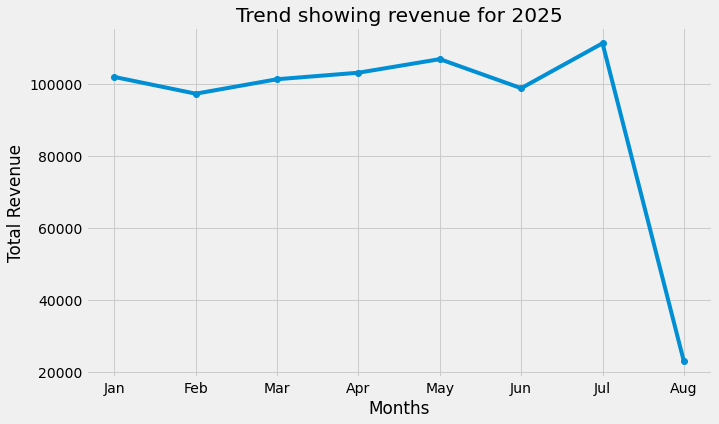

In [53]:
plt.figure(figsize=(10, 6)) # Optional: set figure size
plt.plot(monthly_sales['month'], monthly_sales['price'], marker = 'o') # 'o' adds markers at data points
plt.title('Trend showing revenue for 2025', color = 'black')
plt.xlabel('Months')
plt.ylabel('Total Revenue')

plt.show()

In [25]:
country_sales = df.groupby('country')['price'].sum()
country_sales

country
Kenya       319317.30
Rwanda      327056.55
Tanzania    302255.03
Uganda      308867.92
Name: price, dtype: float64

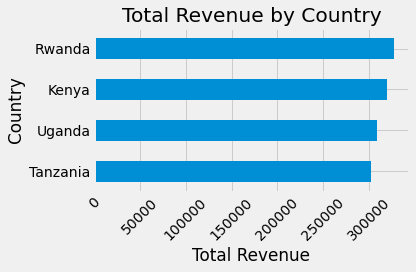

In [26]:
country_sales.sort_values().plot.barh()
plt.title('Total Revenue by Country', color = 'black')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [27]:
country_sales.df = country_sales.to_frame().reset_index()

In [28]:
country_sales.df

country      price
0     Kenya  319317.30
1    Rwanda  327056.55
2  Tanzania  302255.03
3    Uganda  308867.92

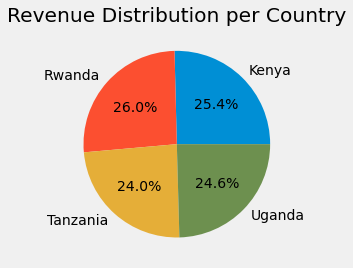

In [54]:
plt.pie(country_sales.df['price'], labels = country_sales.df['country'], autopct='%1.1f%%',textprops={'color': 'black'})
plt.title('Revenue Distribution per Country', color = 'black')

plt.show()

In [30]:
df.head()

order_id customer_id    customer_name                              email  \
0  ORD100000    CUST8820   Sierra Stewart  matthewevans@gardner-salinas.info   
1  ORD100001    CUST5067   Rebecca Miller            kingmelissa@hotmail.com   
2  ORD100002    CUST7937  Andrea Gallegos           schwartzbriana@gmail.com   
3  ORD100003    CUST7964  Matthew Collins              debramclean@gmail.com   
4  ORD100004    CUST3681   Gregory Arnold            lauracherry@hotmail.com   

            city   country order_date delivery_date product_id  \
0         Butare    Rwanda 2025-03-14    2025-03-19    PROD581   
1  Dar es Salaam  Tanzania 2024-08-12    2024-08-17    PROD214   
2           Gulu    Uganda 2024-12-13    2024-12-17    PROD557   
3         Kigali    Rwanda 2025-06-23    2025-06-29    PROD725   
4         Butare    Rwanda 2024-08-24    2024-08-28    PROD450   

     product_name  ...   price  quantity  discount_code_used  \
0       Biography  ...  431.95         4              DEAL25   
1  Vacuum Cleaner  ...  223.69         3              DISC10   
2        Cookbook  ...  132.03         2              DEAL25   
3        Lipstick  ...  385.97         3                 NaN   
4      Sunglasses  ...  136.34         3                 NaN   

  marketing_channel    payment_method order_status  return_reason  \
0            Direct              Card    Completed            NaN   
1            Direct  Cash on Delivery    Completed            NaN   
2          Referral  Cash on Delivery    Completed            NaN   
3             Email            M-Pesa    Completed            NaN   
4        Google Ads              Card     Returned  Late delivery   

  is_repeat_customer Total_Revenue  month  
0                 No       1727.80    Mar  
1                Yes        671.07    Aug  
2                 No        264.06    Dec  
3                 No       1157.91    Jun  
4                 No        409.02    Aug  

[5 rows x 21 columns]

## Average order value per customer

In [31]:
Total_revenue = df['Total_Revenue'].sum()

In [32]:
Number_of_orders = df['order_id'].count()

In [33]:
average_order_value = Total_revenue / Number_of_orders
average_order_value

628.612676

## Repeat buyers vs One-time buyers

In [34]:
comparison = df.groupby('is_repeat_customer').agg(
    avg_total_spent=('Total_Revenue', 'mean'),
    customer_count=('customer_name', 'count')
).reset_index()

print(comparison)

  is_repeat_customer  avg_total_spent  customer_count
0                 No       623.666087            2461
1                Yes       633.407302            2539


# Marketing Effectiveness

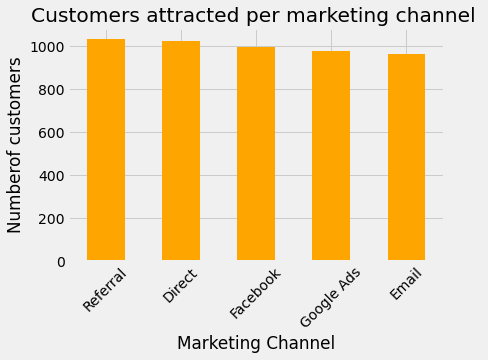

In [55]:
df.groupby('marketing_channel')['order_id'].count().sort_values(ascending = False).plot.bar(color = 'orange')
plt.title('Customers attracted per marketing channel ', color = 'black')
plt.xlabel('Marketing Channel')
plt.ylabel('Numberof customers')
plt.xticks(rotation = 45)

plt.show()

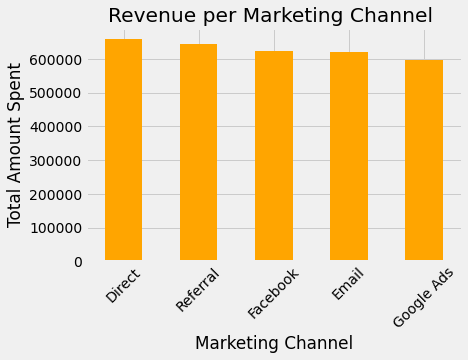

In [56]:
df.groupby('marketing_channel')['Total_Revenue'].sum().sort_values(ascending = False).plot.bar(color = 'orange')
plt.title('Revenue per Marketing Channel ', color = 'black')
plt.xlabel('Marketing Channel')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation = 45)

plt.show()

# Operational Metrics

In [37]:
df['delivery_time_days'] = (df['delivery_date'] - df['order_date']).dt.days

In [38]:
avg_delivery_by_country = df.groupby('country')['delivery_time_days'].mean().reset_index()
avg_delivery_by_country

country  delivery_time_days
0     Kenya            5.542925
1    Rwanda            5.595164
2  Tanzania            5.559265
3    Uganda            5.571315

In [39]:
# Top categories with returns
returned_orders = df[df['order_status'] == 'Returned']

returns_by_category = returned_orders['category'].value_counts()
returns_by_category


Electronics       90
Beauty            86
Fashion           85
Books             78
Home & Kitchen    77
Toys              74
Name: category, dtype: int64

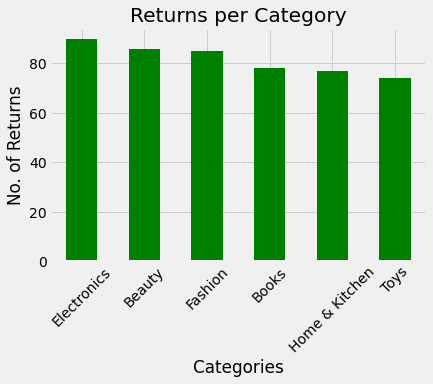

In [40]:
returns_by_category.plot.bar(color = 'green')
plt.title('Returns per Category', color = 'black')
plt.xlabel('Categories')
plt.ylabel('No. of Returns')
plt.xticks(rotation = 45)

plt.show()

In [41]:
# Top products with returns
returns_by_product = returned_orders['product_name'].value_counts()
returns_by_product


Tablet               23
Moisturizer          22
Novel                21
Smartphone           21
Lipstick             20
Jacket               19
Cookware Set         19
Microwave            19
T-shirt              19
Coffee Maker         18
Board Game           18
Sunglasses           17
Biography            17
Laptop               17
Science Fiction      16
Perfume              16
Sneakers             16
RC Car               15
Foundation           15
Bluetooth Speaker    15
Doll                 15
Headphones           14
Jeans                14
Face Wash            13
Self-help            13
Building Blocks      13
Puzzle               13
Vacuum Cleaner       12
Cookbook             11
Blender               9
Name: product_name, dtype: int64

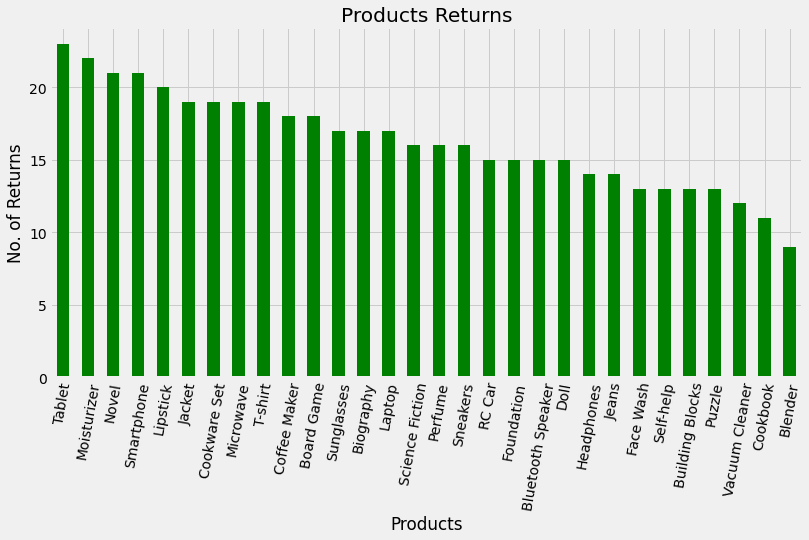

In [57]:
plt.figure(figsize=(12, 6))
returns_by_product.plot.bar(color = 'green')
plt.title('Products Returns', color = 'black')
plt.xlabel('Products')
plt.ylabel('No. of Returns')
plt.xticks(rotation = 80)

plt.show()

In [43]:
# Reasons for returns
returns_by_reason = returned_orders['return_reason'].value_counts()
returns_by_reason

Late delivery            127
Damaged item             126
Wrong item               124
Customer changed mind    113
Name: return_reason, dtype: int64

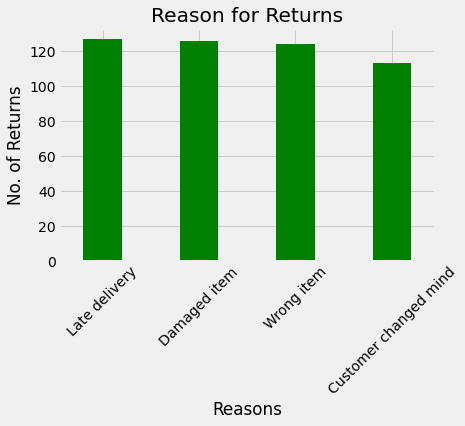

In [44]:
returns_by_reason.plot.bar(color = 'green', width = 0.4)
plt.title('Reason for Returns', color = 'black')
plt.xlabel('Reasons')
plt.ylabel('No. of Returns')
plt.xticks(rotation = 45)

plt.show()

In [45]:
df['used_discount'] = df['discount_code_used'].notnull()

In [46]:
order_counts = df['used_discount'].value_counts()
order_counts

True     3958
False    1042
Name: used_discount, dtype: int64

In [47]:
avg_order_value = df.groupby('used_discount')['Total_Revenue'].mean()
avg_order_value

used_discount
False    636.338244
True     626.578810
Name: Total_Revenue, dtype: float64

In [48]:
with_discount = df[df['used_discount']]['Total_Revenue']
without_discount = df[~df['used_discount']]['Total_Revenue']

t_stat, p_val = stats.ttest_ind(with_discount, without_discount, equal_var=False)
 
print(f"\nT-test Results: t={t_stat}, p-value={p_val}")


T-test Results: t=-0.5743749360410121, p-value=0.5657938352342873


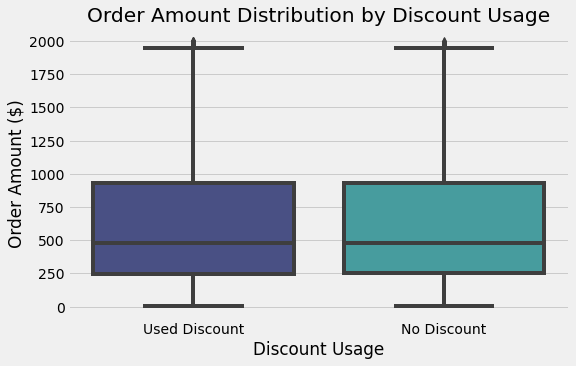

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['used_discount'].map({True: 'Used Discount', False: 'No Discount'}),
            y='Total_Revenue', data=df, palette='mako')
plt.title('Order Amount Distribution by Discount Usage')
plt.ylabel('Order Amount ($)')
plt.xlabel('Discount Usage')
plt.show()